<div class="alert alert-block alert-success">
<h1>Vortex Flow</h1>
</div>

<p style="font-size:17px; color:black; text-align:justify">
Consider a flow where all the streamlines are concentric circles about a given point. Moreover, let the velocity along any given circular streamline be constant, but let it vary from one streamline to another inversely with distance from the common center. Such a flow is called a vortex flow. 
</p>

<p style="font-size:17px; color:black; text-align:justify">
The stream function for this flow: 
    $$\Psi = \frac{\Gamma}{2 \pi} \ln r$$
</p> 

<p style="font-size:17px; color:black; text-align:justify">
The potential function for this flow: 
    $$\Phi = -\frac{\Gamma}{2 \pi} \theta $$
</p> 

<p style="font-size:17px; color:black; text-align:justify">
Below are the stream function $\psi$ and potential function $\phi$ plots (1D/2D) in the domain: $(x,y)\in[-10,10]^2$
</p> 

<p style="font-size:17px; color:red; text-align:justify">The last plot is interactive! </p> 

In [1]:
# HIDDEN
# General Purpose
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import matplotlib.ticker as ticker
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt


# Jupyter Specifics
from IPython.display import HTML
#from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout


%matplotlib inline
matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

style = {'description_width': '150px'}
slider_layout = Layout(width='99%')

In [2]:
# HIDDEN
# Set range
xr = 10
xl = -xr
yu = 10
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y)

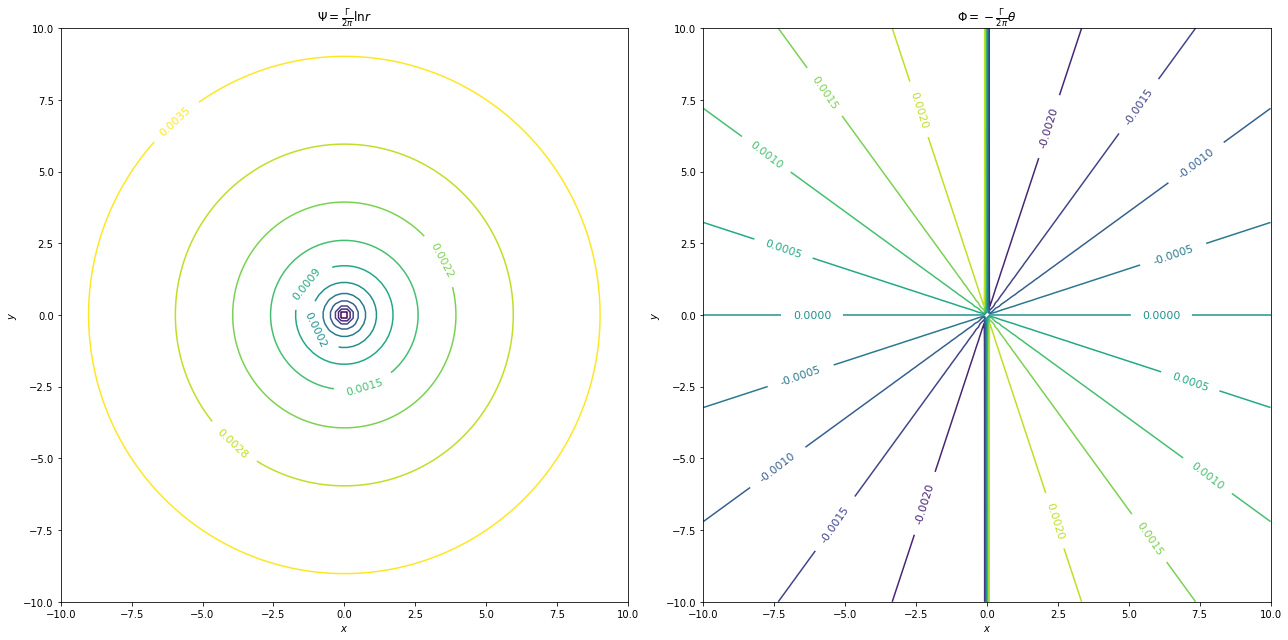

In [3]:
# HIDDEN
# Vortex Flow

# Set freestream velocity
#Gamma = 2 * np.pi #  Set for convenience

Gamma = 0.01

plt.rcParams["figure.figsize"] = (18,9)


plt.subplot(1,2,1)
Z = (Gamma)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )


#CS = plt.contour(X, Y, Z)
levels = np.linspace(np.min(Z),np.max(Z)/1.125,11)
levels = np.linspace(np.min(Z),0.0035,11)


CS = plt.contour(X, Y, Z, levels=levels)
fmt='%1.4f'
plt.clabel(CS, inline=1, fontsize=11,fmt=fmt)
plt.title(r'$\Psi = \frac{\Gamma}{2 \pi} \ln r$')
plt.xlabel('$x$')
plt.ylabel('$y$')


plt.subplot(1,2,2)
#Z = (Lambda)/(2 * np.pi) * np.log( np.power(X,2) + np.power(Y,2) )
Z = -(Gamma)/(2 * np.pi) * np.arctan(Y/X)

#plt.contour(Z,np.linspace(Z.min(),Z.max(),15))
levels = np.linspace(np.min(Z),np.max(Z),11)
CS = plt.contour(X, Y, Z, levels=levels)
#fmt = matplotlib.ticker.EngFormatter()
plt.clabel(CS, inline=1, fontsize=11, fmt=fmt)
#plt.clabel(CS, inline=1, fontsize=11)



#plt.axis('equal','box')
#plt.title('Simplest default with labels')
plt.title(r'$\Phi = -\frac{\Gamma}{2 \pi} \theta$')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.tight_layout()
plt.show()

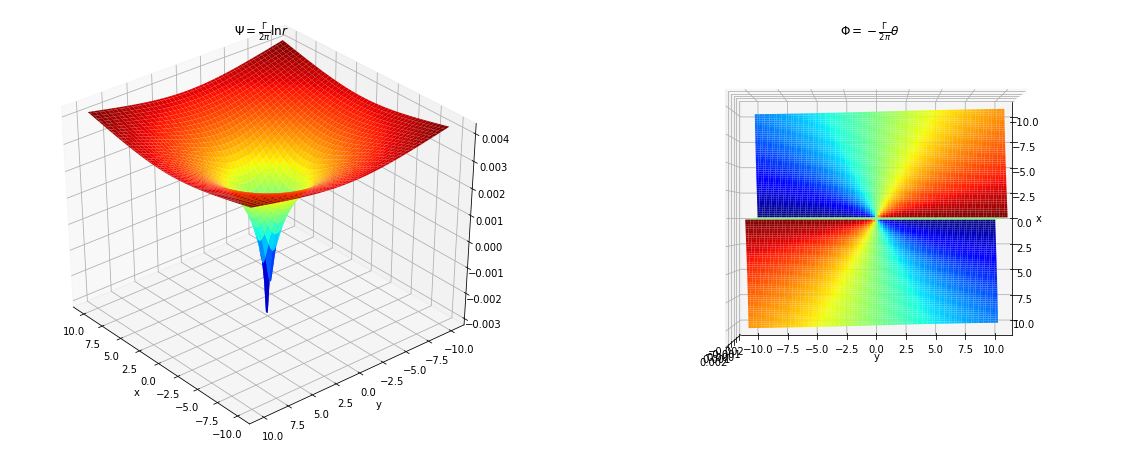

In [4]:
# HIDDEN
# Make data.
 # Set range
plt.rcParams["figure.figsize"] = (20,8)
xr = 10
xl = -xr
yu = 10
yl = -yu

# Set x, y  points
npoints = 100
x = np.linspace(xl, xr, npoints)
y = np.linspace(yl, yu, npoints)
X, Y = np.meshgrid(x, y) 

Vinf = 1
Gamma = 0.01
Z = (Gamma)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )
Z2 = -(Gamma)/(2 * np.pi) * np.arctan(Y/X)

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.jet)
plt.title(r'$\Psi = \frac{\Gamma}{2 \pi} \ln r$')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(35, 140)

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.jet)
plt.title(r'$\Phi = -\frac{\Gamma}{2 \pi} \theta$')
plt.xlabel('x')
plt.ylabel('y')
ax.view_init(90, 0)
plt.show()

In [5]:
# HIDDEN
# Vortex Flow interactive chart

def vortexPlot(C, C2, Gamma):
    # Set freestream velocity
    Vinf = 1 # (units: m/s)
    fig, ax = plt.subplots(figsize=(15, 10)) 
    # Set range
    xr = 10
    xl = -xr
    yu = 10
    yl = -yu
       
    # Set x, y  points
    npoints = 100
    x = np.linspace(xl, xr, npoints)
    y = np.linspace(yl, yu, npoints)
    X, Y = np.meshgrid(x, y)
    
    
    Z = (Gamma)/(2 * np.pi) * np.log( np.sqrt(np.power(X,2) + np.power(Y,2)) )
    CS = plt.contour(X, Y, Z, levels=[C])
    fmt='%1.4f'
    plt.clabel(CS, inline=1, fontsize=16, fmt=fmt)
    

    Z = -(Gamma)/(2 * np.pi) * np.arctan(Y/X)
    CS2 = plt.contour(X, Y, Z, levels=[C2], colors='k',linestyles='dashed')
    plt.clabel(CS2, inline=1, fontsize=16, fmt=fmt)
    
#     plt.title(r'$\Psi = \frac{\Gamma}{2 \pi} \ln r$   and   $\Phi = -\frac{\Gamma}{2 \pi} \theta$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.tight_layout()
    plt.show()

In [6]:
# HIDDEN
interactive_plot = interactive(vortexPlot, 
                               C=widgets.FloatSlider(value=0.006,min=-0.01,max=0.01,step=0.00025,description=r'$\Psi = \frac{\Gamma}{2 \pi} \ln r$', style=style, layout=slider_layout), 
                               C2=widgets.FloatSlider(value=0.001,min=-0.01,max=0.01,step=0.00025,description=r'$\Phi = -\frac{\Gamma}{2 \pi} \theta$', style=style, layout=slider_layout), 
                               Gamma=widgets.FloatSlider(value=0.03,min=0.01,max=0.1,step=0.01,description=r'$\Gamma$', style=style, layout=slider_layout));

interactive_plot.children[0].readout_format = '.4f'
interactive_plot.children[1].readout_format = '.4f'
interactive_plot.children[2].readout_format = '.4f'
interactive_plot

interactive(children=(FloatSlider(value=0.006, description='$\\Psi = \\frac{\\Gamma}{2 \\pi} \\ln r$', layout=…